# Guest Lecture: Artificial Neural Networks 
 - Mike Tamir
    


In [1]:
# Imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import YouTubeVideo
%pylab inline
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


# What are Artificial Neural Networks?
### Conceptual Introduction

Artificial Neural Networks (ANNs) are a staple of machine learning classifiers.  The inspiration for the classifiers is loosely based on the way networks of "neurons" work in the brain.  
   - (Biological) neurons are connected by nerve fibers to one another
   - When a neuron is triggered, it fires a chemical signal across the Synaptic Gap
   - Signals received from other neurons networked to a given cell (stochastically) determine if the given cell will fire, in turn triggering other cells in the network.

![From EngineersGarage](http://www.engineersgarage.com/sites/default/files/imagecache/Original/wysiwyg_imageupload/1/Neural-Networks2.jpg)

Similarly, ANNs form a network of artificial "neurons" (nodes).  The network of artificial neurons are broken up into three classes:
 - An **input layer**, into which the initial training data is fed.
 - One or more **hidden layers**.
     - Machine learning using ANNs with multiple hidden layers is referred to as **"deep learning"**.
 - An **output layer**, which produces the final classification results.
     - The output layer can consist of a *single node* for binary classification,
     - Or it may have multiple nodes for multi-class classification.


![From EngineersGarage](http://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/300px-Colored_neural_network.svg.png)

We will get back to how to interpret these arrows below...

## A Brief History of Artificial Neural Networks

### Single layer (linear) perceptron networks:



In [2]:

def perceptronLogic(training_set, learning_rate, threshold, initial_weights = [0,0,0], divergence = 100000, printing = True):
    
    '''
    This classifier executes a single layer (linear) perceptron algorithm for Boolean Logical operators  
    (xor, or, and, etc...).                                                                              
                                                                                                         
    Output is the final weights for the perceptron single layer, or a "failure to converge" message.     
                                                                                                         
    training_set - is the set of data to train the model, and comes in the from of an array of objects ((x_0, x_1, x_2), y) where x_0 is the bias, x_1 and x_2 are the  inputs, and y is the Boolean  output.
    initial_weigths - give the weight initialization default initial_weights = [0,0,0]                   
    learning_rate -  is the \alpha value                                                                 
    threshold  - is the threshold value above which  the x and weights dot product must exceed           
    divergence - if iterations exceed divergence number the "failure to converge" error results          
    printing = True - turns on printing of the weight values with each iteration                         
    '''
    
    iteration = 0 
    while True:
        iteration += 1
        if printing == True:
            print('-' * 60)
        error_count = 0
        for input_vector, desired_output in training_set:
            if printing == True:
                print "Weights vector =" + str(weights)
            result = np.dot(input_vector, weights) > threshold
            error = desired_output - result
            if printing == True:
                print "error = " + str(error)
            if error != 0:
                error_count += 1
                for index, value in enumerate(input_vector):
                    weights[index] += learning_rate * error * value
            if printing == True:
                print "iteration number " + str(iteration)
            
        if iteration >= divergence:
            print "WARNING: Failure to converge after " + str(divergence) + " iterations"
            break #problem?
        if error_count == 0:
            print "error count converged to 0"
            print "Final weights vector =" + str(weights)
            break

Now lets check out the single layer perceptron works on a couple of Boolian operators:

AND:   
<table>
    <tr>
        <th>$x_1$</th><th>$x_2$</th><th>$ x_1 \wedge x_2 $</th>
    </tr>
    <tr><td>1</td><td>1</td><td>1</td></tr>
    <tr><td>1</td><td>0</td><td>0</td></tr>
    <tr><td>0</td><td>1</td><td>0</td></tr>
    <tr><td>0</td><td>0</td><td>0</td></tr>
</table>

In [3]:
AND = [((1, 1, 1), 1),
       ((1, 1, 0), 0), 
       ((1, 0, 1), 0),  
       ((1, 0, 0), 0)]

OR:
<table>
    <tr>
        <th>$x_1$</th><th>$x_2$</th><th>$ x_1 \vee x_2 $</th>
    </tr>
    <tr><td>1</td><td>1</td><td>1</td></tr>
    <tr><td>1</td><td>0</td><td>1</td></tr>
    <tr><td>0</td><td>1</td><td>1</td></tr>
    <tr><td>0</td><td>0</td><td>0</td></tr>
</table>

In [4]:
OR =  [((1, 1, 1), 1),
       ((1, 1, 0), 1), 
       ((1, 0, 1), 1),  
       ((1, 0, 0), 0)]

NAND:
<table>
    <tr>
        <th>$x_1$</th><th>$x_2$</th><th>$ \neg (x_1 \wedge x_2) $</th>
    </tr>
    <tr><td>1</td><td>1</td><td>0</td></tr>
    <tr><td>1</td><td>0</td><td>1</td></tr>
    <tr><td>0</td><td>1</td><td>1</td></tr>
    <tr><td>0</td><td>0</td><td>1</td></tr>
</table>

In [5]:
NAND = [((1, 1, 1), 0), 
        ((1, 1, 0), 1), 
        ((1, 0, 1), 1), 
        ((1, 0, 0), 1)]

Now lets check out how the perceptron algorithm works for some of these training sets:

In [7]:
training_set = AND
#training_set = OR
#training_set = NAND
threshold = 0.5
learning_rate = 0.1
weights = [0, 0, 0]

perceptronLogic(training_set = training_set, 
                learning_rate = learning_rate, 
                threshold = threshold, 
                initial_weights = [0,0,0], 
                divergence = 10000, 
                printing = True)

------------------------------------------------------------
Weights vector =[0, 0, 0]
error = 1
iteration number 1
Weights vector =[0.1, 0.1, 0.1]
error = 0
iteration number 1
Weights vector =[0.1, 0.1, 0.1]
error = 0
iteration number 1
Weights vector =[0.1, 0.1, 0.1]
error = 0
iteration number 1
------------------------------------------------------------
Weights vector =[0.1, 0.1, 0.1]
error = 1
iteration number 2
Weights vector =[0.2, 0.2, 0.2]
error = 0
iteration number 2
Weights vector =[0.2, 0.2, 0.2]
error = 0
iteration number 2
Weights vector =[0.2, 0.2, 0.2]
error = 0
iteration number 2
------------------------------------------------------------
Weights vector =[0.2, 0.2, 0.2]
error = 0
iteration number 3
Weights vector =[0.2, 0.2, 0.2]
error = 0
iteration number 3
Weights vector =[0.2, 0.2, 0.2]
error = 0
iteration number 3
Weights vector =[0.2, 0.2, 0.2]
error = 0
iteration number 3
error count converged to 0
Final weights vector =[0.2, 0.2, 0.2]


## XOR Problem
Perceptron's will find a solution for a given set of training data, _if there is a solution_.  Unfortunately, in cases of non-linearly separable  data, a solution does not always exist.  

Take for example the XOR data set:

XOR: 
<table>
    <tr>
        <th>$x_1$</th><th>$x_2$</th><th>$ x_1 \oplus x_2 $</th>
    </tr>
    <tr><td>1</td><td>1</td><td>0</td></tr>
    <tr><td>1</td><td>0</td><td>1</td></tr>
    <tr><td>0</td><td>1</td><td>1</td></tr>
    <tr><td>0</td><td>0</td><td>0</td></tr>
</table>

In [8]:
XOR = [((1, 1, 1), 0), 
       ((1, 1, 0), 1),
       ((1, 0, 1), 1), 
       ((1, 0, 0), 0)]

In [9]:
training_set = XOR
threshold = 0.5
learning_rate = 0.1
weights = [0, 0, 0]

perceptronLogic(training_set = training_set, 
                learning_rate = learning_rate, 
                threshold = threshold, 
                initial_weights = [0,0,0], 
                divergence = 100000, 
                printing = False)

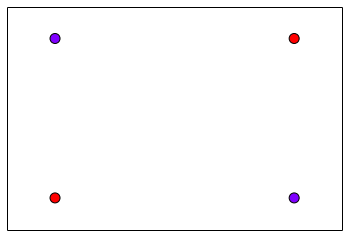

In [10]:
# plot it to take a look
X = array([[0, 1], [1, 0], [0, 0], [1, 1]])
Y = array([1, 1, 0, 0])
N = Y.shape[0]

scatter(X[:, 0], X[:, 1], c=Y, cmap=cm.rainbow_r, s=100)
r = setp(gca(), xticks=(), yticks=())

Because the data set is not linearly separable, our perceptron model cannot possibly converge to a solution.

## Lets return to the ANN diagram:

![From EngineersGarage](http://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/300px-Colored_neural_network.svg.png)
## A little math...

Each set of arrows between non-input layers of the ANN we learn a "weight matrix"

## $$ W := [W]_{ji} $$

Where each $[W]_{ji} $ entry defines the contribution of the  $ i^{th}$ neuron in the previous layer to the $j^{th}$ neuron on the next layer. 
 - (Each $[W]_{ji} $ represents an "arrow" in other words.) 

Explicitly, if $\overrightarrow{x^{(k-1)}} $ is the vector of outputs form the last  $ {(k-1)}^{th}$ layer, then the $i$ neurons on the  $ k^{th}$ layer are fed the following vector:

## $$ \overrightarrow{z^{(k)}} = W\overrightarrow{x^{(k-1)}} $$


the $ \overrightarrow{z^{(k)}}$ vector is then transformed with an activation function

## $$ f(\overrightarrow{z^{(k)}}) = \overrightarrow{x^{(k)}} $$ ##

which defines how the "triggers" from the previous layer neurons translate into a signal $\overrightarrow{x^{(k)}}$ that is sent from the current layer.  
 - (In other words, each node represents an "activation function" $ f(\overrightarrow{z^{(k)}})$ describing how the neuron reacts to inputs from the previous layer.)

## So why do perceptrons fail to converge?

The answer is that they were not using a good enough activation function.

In order to seperate non-linearly seperable data, we need to add an element of non-linear transfomrations, likessigmod functions of the form:

 - ### $ f(\overrightarrow{z_{(k)}}) = \tanh(z_{(k)}) $ ###
 - ### $ f(\overrightarrow{z_{(k)}}) = \frac{1}{1+\exp(-z_{(k)})} $ ###

The second one you may recognize as the "logistic function".

## Plot of some activation functions:

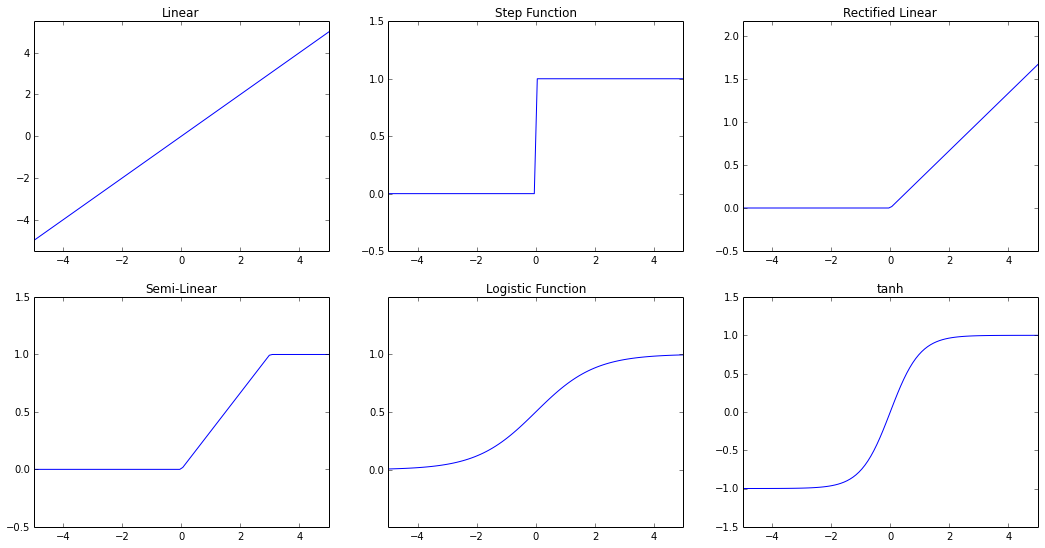

In [11]:
def plot_afun(x, y, sp_idx, label=None):
    """Plot activation function."""
    ax = subplot(3, 3, sp_idx)
    if label is not None: title(label)
    setp(ax, xlim=(min(x), max(x)), ylim=(min(y)-0.5, max(y)+0.5))
    plot(x, y)

def logistic(z): 
    return 1.0/(1+exp(-z))    
    
figure(figsize=(18, 14))
x = linspace(-5, 5, 100)

plot_afun(x, x, 1, label="Linear")
plot_afun(x, numpy.max((sign(x), zeros_like(x)), axis=0), 2, label="Step Function")
plot_afun(x, numpy.max((x/3, zeros_like(x)), axis=0), 3, label="Rectified Linear")
plot_afun(x, np.piecewise(x, [x < 0, (x < 3) & (x >= 0),x >= 3], [0, lambda x: x/3.0, 1]), 4, label="Semi-Linear")
plot_afun(x, logistic(x), 5, label="Logistic Function")
plot_afun(x, tanh(x), 6, label="tanh")


## Hidden layers as automated Feature Engeneering...

One way to think about what is going on with ANNs is that each hidden layer is an exercise in figuring out the best way to Feature Engeneer the the input data in an automated way.

- The $W$ matrix represents a round of "rotation" and "linear streaching" (and possible projections and translations when we include "bias terms").
- Then at the neurons, the features can be *non-linearly* transformed by the activation functions.
- With each hidden layer we are adding another round of linear (rotation + streaching + possible projections and translations) and then non-linear transformations:
![](http://colah.github.io/posts/2014-03-NN-Manifolds-Topology/img/spiral.1-2.2-2-2-2-2-2.gif)

   + gif courtsy of the excelent blog entry http://colah.github.io/posts/2014-03-NN-Manifolds-Topology/


## Lets see this working in action:

In [ ]:
print YouTubeVideo("MkLJ-9MubKQ").src
YouTubeVideo("MkLJ-9MubKQ")

# Neural Network Learning

### Which parameters must be learnt for a Neural network?

Recall, for each of the non-input layers of a neural net, we must ostensibly learn each of the $W_{ji}$ matrix of weights, as well as the parameters associated with the activation functions at each node. This means that even with a small number of layers, the number of parameters that need to be learnt blows up very quickly

### Example:
For an ANN with 1 hidden layer, with just 3 nodes at each layer, one must learn:
   - $3\times3$ parameters for the first weight matrix,
   - $3\times3$ paameters for the second weight matrix, and
   - For a total of **81** different parameters to be learnt.
    
Since grid search is exponential in the number of parmeters that need to be learnt, even for the simplist of networks, it is not practical to optimize with brute force learning.


Instead, a technique known as _Backwards propigation_ or "_Backprop_" is used to efficiently learn the parameters of the weight matricies.

# What is Backprop?
- Backwards propagation is an algorithm for calculating the "gradient error function" of an ANNs weights $W$
- By calculating the gradient the algorithm updates $W$ until a minimum in the Error function is reached.
- The gradient decent can be executed in
  - Batch GD (using all the data, update and then run again),
  - Semi-Batch GD (using small batches of the data at a time, updating, and running again), or
  - Stochastic GD (updating with each new data point).

# Backprop lerning: High level
Backward propagation learning has two phases: propagation and weight update.

1. Propagation Phase
    1. To begin, the training data is "Forward Propagated" through the ANN to determine the activation values  ( $\overrightarrow{z^{(k)}}$ ) fed into each layer and resulting from the final output.
    2. For the "Backward Propagation" direction, a series of $\delta_i$ values used to update the weight values $W_{ij}$ are calculated by comparing the output of the final layer to the target value of the training data and the dependency of that output on the activations of previous layers. 

2. Weight update Phase
    1. Following the Propagation Phase, the weight values fanning into each node are updated. 
    2. The new weight is calculated by taking the product of the output delta and input activation to get the gradient of the weight.
    3. The updated weight is calculated by subtracting a percentage ($ \alpha $ of this value from the original weight.
        4. $\alpha $ is referred to as the **learning rate** and influences the speed of learning process. 
        5. The lower the $\alpha $, the more accurate (but slow) the training is. 

Phases 1 and 2 are repeated until optimal Error performance on the training data is achieved.

## ForwardProp

Recall, for each layer:

### $$z^{(k)}_i = \sum_j W^{(k)}_{ij} x^{(k-1)}_j$$ ###
### $$x^{(k)}_i = f(z^{(k)}_i)$$ ###

Error function (SSE)

### $$E = \frac{1}{2} \sum_n \left( \overrightarrow{y_{(n)}} - \overrightarrow{\hat{y}_{(n)}} \right)^2$$ ###

where
 - $x^{(k)}_i$ is the $i^{th}$ output of the $k^{th}$ layer
 - $x^{(k-1)}_i$ is the $i^{th}$ output of the $(k-1)^{th}$ layer
 - $W^{(k)}_{ij}$ is the the element of the weight matrix from i to j
 - $z^{(k)}_{j}$ is activation value fed to the $j^{th}$ neuron
 - $f$ is the activation function, in the hidden layers
 - $\overrightarrow{y_{(n)}}$ is the actual target output vector for the for the $n^{th}$ training data point
 - $\overrightarrow{\hat{y}_{(n)}}$ is the predicted target output from the $n^{th}$ training data point
 

## Motivating the of Backprop Phase
As with other machine learning algorithms, when training neural nets we want to set up a method of updating the parameters so that the predicted outputs have the optimal likelihood of generating a result that is "close" to the actual outputs. 

In the case of neural nets, these parameters come in the form of the $W_{ij}$ matrix entries transforming the output of the previous layer ($\vec{x}$) into the vector that is fed into the activation functions of the subsequent layer ($\vec{z}$).  

Recall: In other machine learning algorithms this is done for instance with gradient descent where the parameters are updated based on the error generated when the results of a parameterized function (e.g. $f_{\vec{\beta}}(\vec{x_{(n)}}) = \hat{y_{(n)}}$) are compared using some cost function to the true outputs $y_n$.  The parameters are then updated by directly taking the partial derivatives of the cost function with respect to each the parameters (for the fixed, given data). The parameters are then updated based on these derivatives to reduce the total error. 

The Backprop algorithm aims to do essentially same thing (find partial derivatives representing how much a parameter contributes to the error and then correct for that contribution), but since with neural nets there are several layers of parameters intermixed with activation functions, finding these derivatives is easiest when we work our way backwards keeping track of the "error" ($\vec{\delta}^{(k)}$) at each layer as we make our way back.

### The Backprop Equations:

The specific rule (in the gradient descent case) for updating each of the weights $W^{(k)}_{ij}$ is as follows:

### $$\Delta W^{(k)}_{ij} = - \alpha  \frac{\partial E}{\partial W^{(k)}_{ij}} = - \alpha x^{(k-1)}_j \delta^{(k)}_i$$


where
### $$\delta^{(k)}_i = \begin{cases}f'(z^{(k)}_{i}) \big(\hat{y_i} - y_i\big) & \text{in the output layer}\\\\ f'(z^{(k)}_{i}) \big(\sum_{j}W^{(k)}_{ji}\delta^{(k+1)}_j\big) & \text{otherwise}\end{cases}.$$ 

this updating can be done one at a time (for each $(\vec{x}_{(n)},y_{(n)})$ pair) or in batches (over all training examples) or mini-batches of small subsets of training examples each time. 

The (mini-)batch updating rule for a (sub)set of data points $\{(\vec{x}_{(n_1)},y_{(n_1)}),... (\vec{x}_{(n_M)},y_{(n_M)})\}$ hence looks like:

### $$\Delta W^{(k)}_{ij} = - \alpha \overline{ \frac{\partial E}{\partial W^{(k)}_{ij}}} = - \alpha \frac{1}{M} \sum_{m=1}^Mx^{(k-1)}_{(n_m)\ j} \delta^{(k)}_{(n_m)\ i}$$


# Challenges with Traditional Backprop
## Challenge 1: Slow learning due to elliptical error surface.
   - This leads to a "zigzag" phenomenon as the algorithm searches for a minimum of the error surface:
![elliptical](http://www.willamette.edu/~gorr/classes/cs449/figs/valley1.gif)



   - The "zigzag" effect is like when someone riding a snowboard goes down a half-pipe. 
     + At the edge, the direction of steepest decent is not directly along the pipe, it is toward the min at the center of cross sections of the pipe (or ellipse).  
     + By the time you get to the bottom, too much momentum is built up, and the snowboarder (algorithm) starts going back up and needs to turn around again.  
     + This leads to slow learning.
    
    
![half-pipe](http://newsimg.bbc.co.uk/media/images/41185000/gif/_41185544_halfpipe_416.gif)

** Solutions to Challenge 1**
1. Challenge 1 is generally solved by strategically modifying the learning rate. In general, if the error grows or we see oscillation, the learning rate must be turned down, but if the error is falling reliably (but slowly) the learning rate may need to be turned up. 
   1. **Momentum Methods** - These methods work to "turn down the speed" of the learning rate by paying attention to the "speed" of decent progress (breaking as you approach the bottom of the half pipe).
     - These methods can be advanced to implement but can be very effective in speeding up learning.
     - Momentum methods can typically be used _in combination_ with other techniques.
     <br / >
     <br / >
   2. **Adaptive Learning** - These methods work to slow down based on the curvature of the error surface, looking at the gradient.
     - Other techniques such as will focus on detecting oscillations (e.g. looking at directional flips in the gradient) to slow down the learning rate (e.g. RMSprop)
   <br />
   <br />
2. **Prepare the Data** - A major cause of the zigzag effect is the elliptical shape of the error surface. For a circular error surface, the gradient will point to a true local minimum. Some simple tricks that can help make the error surface more symmetrical (and easier to find the bottom):
   1. Running a PCA on the data can also help keep the round out the error surface by de-correlating the PC dimensions.
   2. *Mean shift* the data so that it is centered around 0, and then *normalize* the data (e.g. divide by the SD).
     - Note: Mean shifted data tends to work better with a $tanh()$ activation (over a logistic one) as the former is centered about 0.

##Challenge 2: Local Minima
  - The error surfaces being optimized in ANN gradient decent will not have a single global minimum. Because of this, the algorithm can frequently find only a local (but non-global) minima.

![local minima](http://www.mathworks.com/matlabcentral/fileexchange/screenshots/7407/original.jpg)

### This happens even in the simplest of cases, like our XOR error surface:



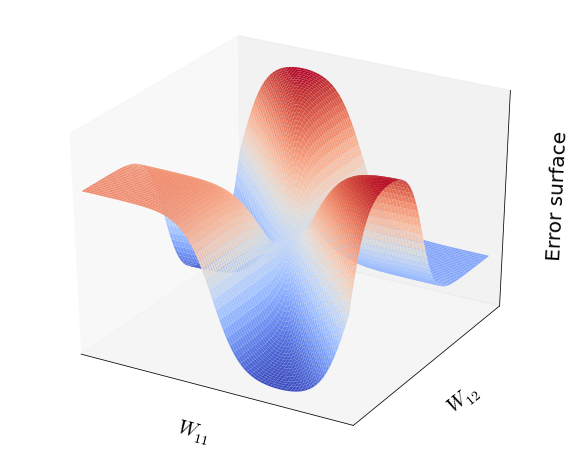

In [13]:
# plot the error surface for XOR
def logistic(z): 
    return 1.0/(1+exp(-z))

def fprop(x1,x2,w1=0.1,w2=0.2,b1=0.1,w3=-0.2,w4=0.2,b2=-0.1,w5=-0.3,w6=-0.25,b3=0.2):
    return logistic(b1+w1*logistic(b2+w3*x1+w4*x2)+w2*logistic(b3+w5*x1+w6*x2))

i, j = 4, 5 # Weight indices
fig = figure(figsize=(10, 8))
W1, W2 = meshgrid(arange(-10, 10, 0.25), arange(-10, 10, 0.25))
E = numpy.sum([(fprop(X[n, 0], X[n, 1], **{"w%d"%(i+1) : W1, "w%d"%(j+1) : W2})-Y[n])**2
               for n in range(N)], axis=0)
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(W1, W2, E, rstride=1, cstride=1,
                       cmap=cm.coolwarm, lw=0)
setp(ax, xticks=(), yticks=(), zticks=(),
     xlabel="$W_{11}$", ylabel="$W_{12}$", zlabel="Error surface")
matplotlib.rcParams.update({"font.size": 20})

## Challenge 3: Over Fitting
Because ANNs involve so many degrees of freedom in the learnt parameters, over fitting the training data is another common challenge.  Over-fitting can be avoided by a number of methods:
 - $L_1$ and $L_2$ **regularization** will drive down weight values $W_{ij}$ .
 - Regularization effects can also be achieved by **adding noise** to the training data.
 - **Early stoping** - by terminating the backprop cycle early overfitting can also be avoided
 - One risk of deep nets is that early layers can over fit and be re-compensated for in earlier layers.  The **Dropout Method** in which multiple versions of the network are trained with nodes removed and then the weight matrices are averaged together, will add more stability and prevent this phenomenon.

# Initializing the weights $ W_{ij}$
* Draw components of $W_{ij}$ iid (independent and identically distributed) from a Gaussian distribution with **small** standard deviation, e.g. 0.05.
* Otherwise the symmetry of the system will not allow it to learn different weight values for the nodes
* Initialization with 0 will prevent the gradient from flowing back to the lower layers:
### $$\frac{\partial E}{\partial x_i} = \delta_j W_{ji}$$

In [14]:
#generating random values for W_ij
random.randn(10) * 0.05

array([-0.00999575, -0.01644917,  0.01316548, -0.00895507, -0.03168863,
        0.00304843, -0.00733766, -0.00112021,  0.06376309, -0.0180768 ])

# Practice with the Theano Tutorial.
The following is taken (with minor adaptations from [Theano project tutorial](http://nbviewer.ipython.org/github/craffel/theano-tutorial/blob/master/Theano%20Tutorial.ipynb).  

In order to run through this tutorial, you will have to install Theano on your machine.  The following pip install will work for MAC users:

In [ ]:
### Installing theano on MAC:
#!pip install Theano

### If you use Anaconda this may be needed:  
#!export DYLD_FALLBACK_LIBRARY_PATH=$DYLD_FALLBACK_LIBRARY_PATH:/Users/[YOUR_USER_NAME]]/anaconda/lib

### Check with this command:
#!echo $DYLD_FALLBACK_LIBRARY_PATH

### Or you might try:
#!pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git



import theano
# By convention, the tensor submodule is loaded as T
import theano.tensor as T

### Layer class 

We'll be defining our multilayer perceptron as a series of "layers", each applied successively to the input to produce the network output.  Each layer is defined as a class, which stores a weight matrix and a bias vector and includes a function for computing the layer's output.  

### (A differnece in Theano)
Note that if we weren't using Theano, we might expect the `output` method to take in a vector and return the layer's activation in response to this input.  However, with Theano, the `output` function is instead meant to be used to _create_ (using `theano.function`) a function which can take in a vector and return the layer's activation.  So, if you were to pass, say, a `np.ndarray` to the `Layer` class's `output` function, you'd get an error.  Instead, we'll construct a function for actually computing the `Layer`'s activation outside of the class itself.

(For Theano basics details see the tutorial link posted above.)

In [ ]:
class Layer(object):
    def __init__(self, W_init, b_init, activation):
        '''
        A layer of a neural network, computes s(Wx + b) where s is a nonlinearity and x is the input vector.

        :parameters:
            - W_init : np.ndarray, shape=(n_output, n_input)
                Values to initialize the weight matrix to.
            - b_init : np.ndarray, shape=(n_output,)
                Values to initialize the bias vector
            - activation : theano.tensor.elemwise.Elemwise
                Activation function for layer output
        '''
        # Retrieve the input and output dimensionality based on W's initialization
        n_output, n_input = W_init.shape
        # Make sure b is n_output in size
        assert b_init.shape == (n_output,)
        # All parameters should be shared variables.
        # They're used in this class to compute the layer output,
        # but are updated elsewhere when optimizing the network parameters.
        # Note that we are explicitly requiring that W_init has the theano.config.floatX dtype
        self.W = theano.shared(value=W_init.astype(theano.config.floatX),
                               # The name parameter is solely for printing purporses
                               name='W',
                               # Setting borrow=True allows Theano to use user memory for this object.
                               # It can make code slightly faster by avoiding a deep copy on construction.
                               # For more details, see
                               # http://deeplearning.net/software/theano/tutorial/aliasing.html
                               borrow=True)
        # We can force our bias vector b to be a column vector using numpy's reshape method.
        # When b is a column vector, we can pass a matrix-shaped input to the layer
        # and get a matrix-shaped output, thanks to broadcasting (described below)
        self.b = theano.shared(value=b_init.reshape(-1, 1).astype(theano.config.floatX),
                               name='b',
                               borrow=True,
                               # Theano allows for broadcasting, similar to numpy.
                               # However, you need to explicitly denote which axes can be broadcasted.
                               # By setting broadcastable=(False, True), we are denoting that b
                               # can be broadcast (copied) along its second dimension in order to be
                               # added to another variable.  For more information, see
                               # http://deeplearning.net/software/theano/library/tensor/basic.html
                               broadcastable=(False, True))
        self.activation = activation
        # We'll compute the gradient of the cost of the network with respect to the parameters in this list.
        self.params = [self.W, self.b]
        
    def output(self, x):
        '''
        Compute this layer's output given an input
        
        :parameters:
            - x : theano.tensor.var.TensorVariable
                Theano symbolic variable for layer input

        :returns:
            - output : theano.tensor.var.TensorVariable
                Mixed, biased, and activated x
        '''
        # Compute linear mix
        lin_output = T.dot(self.W, x) + self.b
        # Output is just linear mix if no activation function
        # Otherwise, apply the activation function
        return (lin_output if self.activation is None else self.activation(lin_output))

### MLP class

Most of the functionality of our MLP is contained in the `Layer` class; the `MLP` class is essentially just a container for a list of `Layer`s and their parameters.  The `output` function simply recursively computes the output for each layer.  Finally, the `squared_error` returns the squared Euclidean distance between the output of the network given an input and the desired (ground truth) output.  This function is meant to be used as a cost in the setting of minimizing cost over some training data.  As above, the `output` and `squared error` functions are not to be used for actually computing values; instead, they're to be used to create functions which are used to compute values.

In [ ]:
class MLP(object):
    def __init__(self, W_init, b_init, activations):
        '''
        Multi-layer perceptron class, computes the composition of a sequence of Layers

        :parameters:
            - W_init : list of np.ndarray, len=N
                Values to initialize the weight matrix in each layer to.
                The layer sizes will be inferred from the shape of each matrix in W_init
            - b_init : list of np.ndarray, len=N
                Values to initialize the bias vector in each layer to
            - activations : list of theano.tensor.elemwise.Elemwise, len=N
                Activation function for layer output for each layer
        '''
        # Make sure the input lists are all of the same length
        assert len(W_init) == len(b_init) == len(activations)
        
        # Initialize lists of layers
        self.layers = []
        # Construct the layers
        for W, b, activation in zip(W_init, b_init, activations):
            self.layers.append(Layer(W, b, activation))

        # Combine parameters from all layers
        self.params = []
        for layer in self.layers:
            self.params += layer.params
        
    def output(self, x):
        '''
        Compute the MLP's output given an input
        
        :parameters:
            - x : theano.tensor.var.TensorVariable
                Theano symbolic variable for network input

        :returns:
            - output : theano.tensor.var.TensorVariable
                x passed through the MLP
        '''
        # Recursively compute output
        for layer in self.layers:
            x = layer.output(x)
        return x

    def squared_error(self, x, y):
        '''
        Compute the squared euclidean error of the network output against the "true" output y
        
        :parameters:
            - x : theano.tensor.var.TensorVariable
                Theano symbolic variable for network input
            - y : theano.tensor.var.TensorVariable
                Theano symbolic variable for desired network output

        :returns:
            - error : theano.tensor.var.TensorVariable
                The squared Euclidian distance between the network output and y
        '''
        return T.sum((self.output(x) - y)**2)

### Gradient descent

To train the network, we will minimize the cost (squared Euclidean distance of network output vs. ground-truth) over a training set using gradient descent.  When doing gradient descent on neural nets, it's very common to use momentum, which is simply a leaky integrator on the parameter update.  That is, when updating parameters, a linear mix of the current gradient update and the previous gradient update is computed.  This tends to make the network converge more quickly on a good solution and can help avoid local minima in the cost function.  With traditional gradient descent, we are guaranteed to decrease the cost at each iteration.  When we use momentum, we lose this guarantee, but this is generally seen as a small price to pay for the improvement momentum usually gives.

In Theano, we store the previous parameter update as a shared variable so that its value is preserved across iterations.  Then, during the gradient update, we not only update the parameters, but we also update the previous parameter update shared variable.

In [ ]:
def gradient_updates_momentum(cost, params, learning_rate, momentum):
    '''
    Compute updates for gradient descent with momentum
    
    :parameters:
        - cost : theano.tensor.var.TensorVariable
            Theano cost function to minimize
        - params : list of theano.tensor.var.TensorVariable
            Parameters to compute gradient against
        - learning_rate : float
            Gradient descent learning rate
        - momentum : float
            Momentum parameter, should at least 0 (standard gradient descent) and less than 1
   
    :returns:
        updates : list
            List of updates, one for each parameter
    '''
    # Make sure momenum is a sane value
    assert momentum < 1 and momentum >= 0
    # List of update steps for each parameter
    updates = []
    # Just gradient descent on cost
    for param in params:
        # For each parameter, we'll create a param_update shared variable.
        # This variable will keep track of the parameter's update step across iterations.
        # We initialize it to 0
        param_update = theano.shared(param.get_value()*0., broadcastable=param.broadcastable)
        # Each parameter is updated by taking a step in the direction of the gradient.
        # However, we also "mix in" the previous step according to the given momentum value.
        # Note that when updating param_update, we are using its old value and also the new gradient step.
        updates.append((param, param - learning_rate*param_update))
        # Note that we don't need to derive backpropagation to compute updates - just use T.grad!
        updates.append((param_update, momentum*param_update + (1. - momentum)*T.grad(cost, param)))
    return updates

### Toy example

We'll train our neural network to classify two Gaussian-distributed clusters in 2d space.

In [ ]:
# Training data - two randomly-generated Gaussian-distributed clouds of points in 2d space
np.random.seed(0)
# Number of points
N = 1000
# Labels for each cluster
y = np.random.random_integers(0, 1, N)
# Mean of each cluster
means = np.array([[-1, 1], [-1, 1]])
# Covariance (in X and Y direction) of each cluster
covariances = np.random.random_sample((2, 2)) + 1
# Dimensions of each point
X = np.vstack([np.random.randn(N)*covariances[0, y] + means[0, y],
               np.random.randn(N)*covariances[1, y] + means[1, y]])
# Plot the data
plt.figure(figsize=(8, 8))
plt.scatter(X[0, :], X[1, :], c=y, lw=.3, s=3, cmap=plt.cm.cool)
plt.axis([-6, 6, -6, 6])
plt.show()

In [ ]:
# First, set the size of each layer (and the number of layers)
# Input layer size is training data dimensionality (2)
# Output size is just 1-d: class label - 0 or 1
# Finally, let the hidden layers be twice the size of the input.
# If we wanted more layers, we could just add another layer size to this list.
layer_sizes = [X.shape[0], X.shape[0]*2, 1]
# Set initial parameter values
W_init = []
b_init = []
activations = []
for n_input, n_output in zip(layer_sizes[:-1], layer_sizes[1:]):
    # Getting the correct initialization matters a lot for non-toy problems.
    # However, here we can just use the following initialization with success:
    # Normally distribute initial weights
    W_init.append(np.random.randn(n_output, n_input))
    # Set initial biases to 1
    b_init.append(np.ones(n_output))
    # We'll use sigmoid activation for all layers
    # Note that this doesn't make a ton of sense when using squared distance
    # because the sigmoid function is bounded on [0, 1].
    activations.append(T.nnet.sigmoid)
# Create an instance of the MLP class
mlp = MLP(W_init, b_init, activations)

# Create Theano variables for the MLP input
mlp_input = T.matrix('mlp_input')
# ... and the desired output
mlp_target = T.vector('mlp_target')
# Learning rate and momentum hyperparameter values
# Again, for non-toy problems these values can make a big difference
# as to whether the network (quickly) converges on a good local minimum.
learning_rate = 0.01
momentum = 0.9
# Create a function for computing the cost of the network given an input
cost = mlp.squared_error(mlp_input, mlp_target)
# Create a theano function for training the network
train = theano.function([mlp_input, mlp_target], cost,
                        updates=gradient_updates_momentum(cost, mlp.params, learning_rate, momentum))
# Create a theano function for computing the MLP's output given some input
mlp_output = theano.function([mlp_input], mlp.output(mlp_input))

In [ ]:
# Keep track of the number of training iterations performed
iteration = 0
# We'll only train the network with 20 iterations.
# A more common technique is to use a hold-out validation set.
# When the validation error starts to increase, the network is overfitting,
# so we stop training the net.  This is called "early stopping", which we won't do here.
max_iteration = 20
while iteration < max_iteration:
    # Train the network using the entire training set.
    # With large datasets, it's much more common to use stochastic or mini-batch gradient descent
    # where only a subset (or a single point) of the training set is used at each iteration.
    # This can also help the network to avoid local minima.
    current_cost = train(X, y)
    # Get the current network output for all points in the training set
    current_output = mlp_output(X)
    # We can compute the accuracy by thresholding the output
    # and computing the proportion of points whose class match the ground truth class.
    accuracy = np.mean((current_output > .5) == y)
    # Plot network output after this iteration
    plt.figure(figsize=(8, 8))
    plt.scatter(X[0, :], X[1, :], c=current_output,
                lw=.3, s=3, cmap=plt.cm.cool, vmin=0, vmax=1)
    plt.axis([-6, 6, -6, 6])
    plt.title('Cost: {:.3f}, Accuracy: {:.3f}'.format(float(current_cost), accuracy))
    plt.show()
    iteration += 1

# References
Some useful notebooks adapted here:

* [Theano project tutorial](http://nbviewer.ipython.org/github/craffel/theano-tutorial/blob/master/Theano%20Tutorial.ipynb)
* [Alexander Fabisch's ML tutorial](http://nbviewer.ipython.org/github/AlexanderFabisch/ml_tutorials/blob/gh-pages/03_ann.ipynb)
- [Aaron Masino's ANN notebook](http://nbviewer.ipython.org/github/masinoa/machine_learning/blob/master/04_Neural_Networks.ipynb)

See also the following ANN and supporting code implementations:
* [Deeplearning4j](http://deeplearning4j.org/) deep-learning library written in Java.
* [Neural Network Package](http://torch.cogbits.com/doc/nn/index.html) in LuaJIT (based on [Torch 7](http://torch.cogbits.com/doc/index.html))
* [Pylearn 2](http://deeplearning.net/software/pylearn2/) in Python (based on [Theano](http://deeplearning.net/software/theano/))
* [cuda-convnet](http://code.google.com/p/cuda-convnet/) in CUDA/Python
* [OpenANN](https://github.com/OpenANN/OpenANN) in C++/Python (based on [Eigen](http://eigen.tuxfamily.org/index.php?title=Main_Page))

For more tips on ANN tips see:
* [Neural Networks: Tricks of the Trade](http://link.springer.com/book/10.1007%2F978-3-642-35289-8) (2nd edition: 2012).